## Hyphothesis 3: 
### The alternaive portfolio will have a return >0.0 and will outperform the Control Portfolio (30 random stocks) on its 5 worst days in 2019

## Criteria for Alternative Portfolio:
### 5 worst trading days (by daily returns) came outside of the 9/2008-12/2008 window

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import boto3
from botocore.client import Config
import os
import pandas as pd
from io import StringIO
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.ticker as ticker
from random import shuffle
import random
from time import time
from pandas.plotting import register_matplotlib_converters

os.chdir('C:\\Users\\A Sua\\Documents\\AWS\\credentials')
list_of_lines = []
with open('capstoner_key.txt') as fp:
    lines = fp.readlines()
    for line in lines:
        line = line.strip()
        list_of_lines.append(line)
    fp.close()


location = list_of_lines[0].split('=')[1]
AWS_ACCESS_KEY_ID = list_of_lines[1].split('=')[1]
AWS_SECRET_ACCESS_KEY = list_of_lines[2].split('=')[1]
os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')
%matplotlib notebook

In [2]:
register_matplotlib_converters()
%matplotlib notebook

### import data

In [3]:
df_name_list = ['df_price07_18', 'df_price19', 'df_returns07_18', 'df_returns19']

In [4]:
df_list = []
for df_name in df_name_list:
    ### BUCKETS & KEYS
    BUCKET_NAME = 'capstonefiu2020-data'
    key_location = 'data/processed'
    file_name = '{}.csv'.format(df_name)
    key_path = key_location + '/' + file_name

    ### ACTIVATE CLIENT
    client = boto3.client('s3', 
                  aws_access_key_id = AWS_ACCESS_KEY_ID,
                   aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


    ### INSTANTIATE DATAFRAME
    csv_obj = client.get_object(Bucket = BUCKET_NAME, Key=key_path)
    body = csv_obj['Body']
    csv_string = body.read().decode('utf-8')

    df = pd.read_csv(StringIO(csv_string))
    df.index = df['Unnamed: 0']
    df = df.drop('Unnamed: 0', axis=1)
    df.index.names = ['date']


    #df_bidlo.head()
    #### TRANSPOSE DATA FOR EASE OF USE
    df = df.T
    df.index = pd.to_datetime(df.index)
    df_list.append(df)
    print('{} has shape: {}'.format(df_name, df.shape))

df_price07_18 has shape: (3020, 388)
df_price19 has shape: (252, 486)
df_returns07_18 has shape: (3020, 388)
df_returns19 has shape: (252, 486)


In [5]:
df_price18 = abs(df_list[0])
df_price19= abs(df_list[1])
df_returns18 = df_list[2]
df_returns19 = df_list[3]

dfsp = pd.read_csv('data\\external\\SP500_07_20.csv')
dfsp.index = pd.to_datetime(dfsp['Date'])
dfsp = dfsp.drop('Date', axis=1)
dfsp.head()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2007-01-03,1418.030029,1429.420044,1407.859985,1416.599976,1416.599976,3429160000,-0.001008
2007-01-04,1416.599976,1421.839966,1408.430054,1418.339966,1418.339966,3004460000,0.001228
2007-01-05,1418.339966,1418.339966,1405.750000,1409.709961,1409.709961,2919400000,-0.006085
2007-01-08,1409.260010,1414.979980,1403.969971,1412.839966,1412.839966,2763340000,0.002540
2007-01-09,1412.839966,1415.609985,1405.420044,1412.109985,1412.109985,3038380000,-0.000517


In [8]:
older_companies = df_price18.columns
newer_companies = df_price19.columns

In [9]:
### companies that traded from 2007-2019
full_companies = []
for key in older_companies:
    if key in newer_companies:
        full_companies.append(key)

print(len(full_companies))

376


### Find the dates of the worst trading days systemically & by the company

In [10]:
dates = df_price19.index
#df_returns.columns[:5]

#### RETURNS: 5 worst Return dates: S&P (2007-2018)

In [11]:
worst_dates_sp18 = pd.to_datetime(['2008-10-15', '2008-09-29', '2008-12-01', '2008-10-09', '2008-11-20'])
worst_dates_sp18

DatetimeIndex(['2008-10-15', '2008-09-29', '2008-12-01', '2008-10-09',
               '2008-11-20'],
              dtype='datetime64[ns]', freq=None)

#### RETURNS: 5 worst Return dates: S&P 2019

In [12]:
dfsp19 = dfsp[(dfsp.index >= '01-01-2019') & (dfsp.index < '01-01-2020')]
worst_dates_sp19 = dfsp19['Return'].sort_values()[:5]

#### RETURNS: 5 worst Return dates: COMPNAY (2007-2018)

In [13]:
worst_days_returns18 = {}
for symbol in full_companies:
    temp_series = df_returns18[symbol].sort_values(ascending=True).iloc[:5]
    worst_days_returns18[symbol] = temp_series
worst_days_returns18['ORCL_ORACLE CORP']

2011-12-21   -0.116558
2008-10-15   -0.098361
2013-03-21   -0.096882
2018-03-20   -0.094321
2013-06-21   -0.092593
Name: ORCL_ORACLE CORP, dtype: float64

#### RETURNS: 5 worst Return dates: COMPNAY (2019)

In [14]:
worst_days_returns19 = {}
for symbol in full_companies:
    temp_series = df_returns19[symbol].sort_values(ascending=True).iloc[:5]
    worst_days_returns19[symbol] = temp_series
worst_days_returns19['ORCL_ORACLE CORP']

2019-09-12   -0.042636
2019-08-05   -0.037249
2019-12-13   -0.034709
2019-08-14   -0.030573
2019-08-23   -0.030269
Name: ORCL_ORACLE CORP, dtype: float64

In [15]:
worst_dates_sp19

Date
2019-08-23   -0.021971
2019-08-14   -0.018503
2019-08-05   -0.018402
2019-01-03   -0.017669
2019-03-22   -0.015402
Name: Return, dtype: float64

### Generate DF 5 Worst Dates + 1 Day Behind

In [33]:
dates_back1 = []
for idx in range(1, len(dates)):
    #print(idx)
    dates_back1.append(dates[idx-1])
dates_back1 = pd.to_datetime(dates_back1)
df_day_behind1 = pd.DataFrame(dates_back1, index=dates[1:], columns=['Day Behind 1'])
df_day_behind1.head()

,Day Behind 1
2019-01-03,2019-01-02
2019-01-04,2019-01-03
2019-01-07,2019-01-04
2019-01-08,2019-01-07
2019-01-09,2019-01-08


In [40]:
day_behind_dates = pd.merge(df_day_behind1, worst_dates_sp19, left_index=True, right_index=True)['Day Behind 1'].values
day_behind_dates

array(['2019-01-02T00:00:00.000000000', '2019-03-21T00:00:00.000000000',
       '2019-08-02T00:00:00.000000000', '2019-08-13T00:00:00.000000000',
       '2019-08-22T00:00:00.000000000'], dtype='datetime64[ns]')

# Alt Portfolio Construction

### generate symbols for alternative portfolio

In [16]:
alt_symbols = []
for symbol in full_companies:
    temp_series = worst_days_returns18[symbol]
    temp_dates = temp_series.index
    temp_val = 0
    for date in temp_dates:
        if (date >= pd.to_datetime('09-01-2008')) and (date <= pd.to_datetime('12-31-2008')):
            temp_val +=1
    if temp_val==0:
        alt_symbols.append(symbol)

In [21]:
len(alt_symbols)

29

### Generate the return of the Alt Portfolio

In [17]:
alt18 = df_price18.loc[:, alt_symbols]
alt19 = df_price19.loc[:, alt_symbols]

In [18]:
alt_close18 = df_price18.loc[:, alt_symbols].loc['2018-12-31', :]
alt_close19 = df_price19.loc[:, alt_symbols].loc['2019-12-31', :]

In [32]:
alt_return = (sum(alt_close19)-sum(alt_close18))/sum(alt_close18)
alt_return

0.18401182001819835

### Check for Each of the 5 Dates

In [42]:
worst_days_alt_portfolio19 = pd.concat([alt19.loc[worst_dates_sp19.index, :], alt19.loc[day_behind_dates, :]]).sort_index()
worst_days_alt_portfolio19

# Control Portfolio Construction

### Generate the return of the Control Portfolio

In [26]:
control_symbols = random.sample(full_companies, 30)

In [27]:
con18 = df_price18.loc[:, control_symbols]
con19 = df_price19.loc[:, control_symbols]
con19.head()

In [28]:
ctl_close18 = df_price18.loc[:, control_symbols].loc['2018-12-31', :]
ctl_close19 = df_price19.loc[:, control_symbols].loc['2019-12-31', :]

In [31]:
ctl_return = (sum(ctl_close19)-sum(ctl_close18))/sum(ctl_close18)
ctl_return

0.26947321551343495

### Check for Each of the 5 Dates

In [44]:
worst_days_ctl_portfolio19 = pd.concat([con19.loc[worst_dates_sp19.index, :], con19.loc[day_behind_dates, :]]).sort_index()
worst_days_ctl_portfolio19

date,GPC_GENUINE PARTS CO,XEC_CIMAREX ENERGY CO,RSG_REPUBLIC SERVICES INC,ORLY_O REILLY AUTOMOTIVE INC,AME_AMETEK INC NEW,CF_C F INDUSTRIES HOLDINGS INC,GPS_GAP INC,SLB_SCHLUMBERGER LTD,TFX_TELEFLEX INC,HIG_HARTFORD FINANCIAL SVCS GRP INC,...,DISCA_DISCOVERY INC,CHD_CHURCH & DWIGHT INC,AES_A E S CORP,BDX_BECTON DICKINSON & CO,BXP_BOSTON PROPERTIES INC,DRI_DARDEN RESTAURANTS INC,HBI_HANESBRANDS INC,JNJ_JOHNSON & JOHNSON,GRMN_GARMIN LTD,PKG_PACKAGING CORP AMERICA
2019-01-02,94.79,62.71,71.53,341.14999,67.49,42.03,25.75,37.20,252.38000,43.42,...,25.83,64.43,14.18,220.08000,109.15000,99.93,12.67,127.75000,62.52,84.55
2019-01-03,93.28,61.84,71.36,346.13000,65.57,40.57,25.79,37.60,246.20000,42.82,...,25.68,64.29,14.17,211.20000,109.61000,98.32,12.52,125.72000,61.39,82.89
2019-03-21,109.10,72.43,79.36,384.60999,82.14,41.11,25.12,44.22,304.95999,48.95,...,26.68,66.77,18.28,245.42000,132.91000,116.11,17.78,138.10001,84.59,98.26
2019-03-22,107.48,67.90,78.90,376.29999,79.41,39.01,24.52,42.47,301.69000,48.53,...,26.67,67.10,18.06,240.12000,131.50999,117.44,16.92,136.91000,83.58,95.13
2019-08-02,92.20,46.65,88.41,369.92999,86.50,52.68,18.04,37.42,361.35001,57.48,...,29.43,74.32,16.83,248.69000,130.14999,120.09,15.16,131.07001,75.69,101.25
2019-08-05,90.08,44.92,86.87,363.62000,84.08,50.74,17.83,35.99,350.60001,56.56,...,29.18,74.14,16.32,236.34000,127.34000,118.02,15.00,130.16000,75.35,99.60
2019-08-13,91.12,42.39,90.27,373.54001,86.09,48.77,17.95,34.63,370.60999,58.90,...,29.60,78.43,15.17,253.34000,127.28000,121.16,14.57,133.42000,79.09,101.50
2019-08-14,88.92,38.34,88.68,369.42999,83.33,47.20,16.53,32.34,365.01001,57.25,...,27.49,77.67,14.79,244.71001,125.62000,116.80,13.93,130.25999,76.51,99.56
2019-08-22,89.81,40.21,89.02,382.17999,85.77,48.54,17.75,33.71,366.16000,59.48,...,28.03,79.32,15.20,255.17999,127.93000,120.90,14.17,131.27000,80.28,101.12
2019-08-23,87.73,38.11,87.42,377.34000,83.62,47.12,16.92,32.03,357.94000,58.10,...,27.01,78.50,14.79,248.31000,125.83000,120.53,13.65,127.73000,78.36,98.09


### Did the Alternative Portfolio beat the Control Portfolio on the 5 wost S&P500 dates?

In [45]:
alt_values_worst_days19 = worst_days_alt_portfolio19.apply(sum, axis=1)
ctl_values_worst_days19 = worst_days_ctl_portfolio19.apply(sum, axis=1)

In [46]:
comparison_dic = {}
idx=0
for i in range(10):
    if i % 2 == 0:
        pass
    else:
        temp_idx = alt_values_worst_days19.index[i]
        temp_sp = worst_dates_sp19[worst_dates_sp19.index==temp_idx].values[0]
        
        temp_start_ctl = ctl_values_worst_days19[i-1]
        temp_start_alt = alt_values_worst_days19[i-1]
        
        temp_end_ctl = ctl_values_worst_days19[i]
        temp_end_alt = alt_values_worst_days19[i]        
        
        temp_ret_ctl = (temp_end_ctl-temp_start_ctl)/temp_end_ctl
        temp_ret_alt = (temp_end_alt-temp_start_alt)/temp_end_alt        
        #print(temp_end, temp_start)
        comparison_dic[temp_idx] = temp_sp, temp_ret_ctl, temp_ret_alt
comparison_dic

{Timestamp('2019-01-03 00:00:00'): (-0.017669119,
  -0.012828240619187449,
  -0.019991572820720796),
 Timestamp('2019-03-22 00:00:00'): (-0.015401565,
  -0.017852660138317197,
  -0.025229374713539646),
 Timestamp('2019-08-05 00:00:00'): (-0.018401928,
  -0.02899631251513856,
  -0.030459059056434284),
 Timestamp('2019-08-14 00:00:00'): (-0.018502775,
  -0.026056480829310596,
  -0.03450790828997261),
 Timestamp('2019-08-23 00:00:00'): (-0.021971288999999998,
  -0.02390453084303722,
  -0.025229159928107335)}

In [223]:
comparison_df = pd.DataFrame(comparison_dic, index=['SP', 'CTL', 'ALT'])
comparison_df

,2019-01-03,2019-03-22,2019-08-05,2019-08-14,2019-08-23
SP,-0.017669,-0.015402,-0.018402,-0.018503,-0.021971
CTL,-0.012828,-0.017853,-0.028996,-0.026056,-0.023905
ALT,-0.019992,-0.025229,-0.030459,-0.034508,-0.025229


In [287]:
# comparison_df.to_csv('data\\external\\comparison_2019.csv')

In [298]:
sp_dates_data = pd.DataFrame(comparison_df.loc['SP'])
sp_dates_data['date'] = sp_dates_data.index
sp_dates_data['date'] = sp_dates_data['date'].astype(str)
sp_dates_data.columns = ['returns', 'date']
sp_dates_data['portfolio'] = 'SP'
sp_dates_data

,returns,date,portfolio
2019-01-03,-0.017669,2019-01-03,SP
2019-03-22,-0.015402,2019-03-22,SP
2019-08-05,-0.018402,2019-08-05,SP
2019-08-14,-0.018503,2019-08-14,SP
2019-08-23,-0.021971,2019-08-23,SP


In [299]:
ctl_dates_data = pd.DataFrame(comparison_df.loc['CTL'])
ctl_dates_data['date'] = ctl_dates_data.index
ctl_dates_data['date'] = ctl_dates_data['date'].astype(str)
ctl_dates_data.columns = ['returns', 'date']
ctl_dates_data['portfolio'] = 'CTL'
ctl_dates_data

,returns,date,portfolio
2019-01-03,-0.012828,2019-01-03,CTL
2019-03-22,-0.017853,2019-03-22,CTL
2019-08-05,-0.028996,2019-08-05,CTL
2019-08-14,-0.026056,2019-08-14,CTL
2019-08-23,-0.023905,2019-08-23,CTL


In [300]:
alt_dates_data = pd.DataFrame(comparison_df.loc['ALT'])
alt_dates_data['date'] = alt_dates_data.index
alt_dates_data['date'] = alt_dates_data['date'].astype(str)
alt_dates_data.columns = ['returns', 'date']
alt_dates_data['portfolio'] = 'ALT'
alt_dates_data

,returns,date,portfolio
2019-01-03,-0.019992,2019-01-03,ALT
2019-03-22,-0.025229,2019-03-22,ALT
2019-08-05,-0.030459,2019-08-05,ALT
2019-08-14,-0.034508,2019-08-14,ALT
2019-08-23,-0.025229,2019-08-23,ALT


In [302]:
total_dates_data = pd.concat([sp_dates_data, ctl_dates_data, alt_dates_data], axis=0)
total_dates_data

,returns,date,portfolio
2019-01-03,-0.017669,2019-01-03,SP
2019-03-22,-0.015402,2019-03-22,SP
2019-08-05,-0.018402,2019-08-05,SP
2019-08-14,-0.018503,2019-08-14,SP
2019-08-23,-0.021971,2019-08-23,SP
2019-01-03,-0.012828,2019-01-03,CTL
2019-03-22,-0.017853,2019-03-22,CTL
2019-08-05,-0.028996,2019-08-05,CTL
2019-08-14,-0.026056,2019-08-14,CTL
2019-08-23,-0.023905,2019-08-23,CTL


### Returns

In [55]:
alt_ret19 = df_returns19.loc[worst_dates_sp19.index, alt_symbols]#.sort_values(by =df_returns19.index )
#alt_ret19.loc[worst_dates_sp19.index, :]
alt_ret19

date,MGM_MGM RESORTS INTERNATIONAL,LH_LABORATORY CORP AMERICA HLDGS,IBM_INTERNATIONAL BUSINESS MACHS COR,HSY_HERSHEY CO,KR_KROGER COMPANY,BMY_BRISTOL MYERS SQUIBB CO,WHR_WHIRLPOOL CORP,MAS_MASCO CORP,IFF_INTERNATIONAL FLAVORS & FRAG INC,CLX_CLOROX CO,...,RMD_RESMED INC,VRSN_VERISIGN INC,BBY_BEST BUY COMPANY INC,FFIV_F 5 NETWORKS INC,AKAM_AKAMAI TECHNOLOGIES INC,ACN_ACCENTURE,CNC_CENTENE CORP DEL,NFLX_NETFLIX INC,STX_SEAGATE TECHNOLOGY PLC,IPGP_I P G PHOTONICS CORP
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-23,-0.025605,-0.012385,-0.035363,-0.008524,-0.016054,-0.026745,-0.034030,-0.046844,-0.012059,-0.020232,...,-0.028374,-0.022807,-0.037645,-0.038346,-0.019500,-0.017979,-0.018222,-0.018489,-0.013871,-0.051872
2019-08-14,-0.038808,-0.015463,-0.033434,-0.018924,-0.033839,-0.018284,-0.043331,-0.031912,-0.048100,-0.010506,...,-0.025558,-0.033882,-0.060598,-0.030241,-0.059192,-0.030641,-0.039212,-0.042174,-0.026184,-0.045335
2019-08-05,-0.024782,-0.030345,-0.044075,-0.019657,-0.014388,-0.013264,-0.017849,-0.031774,-0.016340,-0.011918,...,-0.025944,-0.043777,-0.034875,-0.031861,-0.048800,-0.038651,-0.048068,-0.035128,-0.010906,-0.003713
2019-01-03,-0.019452,-0.021593,-0.019964,0.007587,0.001832,-0.131604,-0.003336,-0.016244,-0.024669,0.005955,...,-0.047329,-0.034989,-0.020522,-0.042623,-0.022200,-0.034142,-0.027257,0.013226,-0.065507,-0.053677
2019-03-22,-0.030112,-0.012668,-0.014070,0.004484,0.000822,-0.015536,-0.037087,-0.021989,-0.008224,0.000443,...,-0.008220,-0.020013,-0.006378,-0.023038,-0.030093,-0.017832,-0.030046,-0.044618,-0.041854,-0.054347


In [57]:
ctl_ret19 = df_returns19.loc[worst_dates_sp19.index, control_symbols]
ctl_ret19

date,GPC_GENUINE PARTS CO,XEC_CIMAREX ENERGY CO,RSG_REPUBLIC SERVICES INC,ORLY_O REILLY AUTOMOTIVE INC,AME_AMETEK INC NEW,CF_C F INDUSTRIES HOLDINGS INC,GPS_GAP INC,SLB_SCHLUMBERGER LTD,TFX_TELEFLEX INC,HIG_HARTFORD FINANCIAL SVCS GRP INC,...,DISCA_DISCOVERY INC,CHD_CHURCH & DWIGHT INC,AES_A E S CORP,BDX_BECTON DICKINSON & CO,BXP_BOSTON PROPERTIES INC,DRI_DARDEN RESTAURANTS INC,HBI_HANESBRANDS INC,JNJ_JOHNSON & JOHNSON,GRMN_GARMIN LTD,PKG_PACKAGING CORP AMERICA
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-23,-0.023160,-0.052226,-0.017973,-0.012664,-0.025067,-0.029254,-0.046761,-0.049837,-0.022449,-0.023201,...,-0.036390,-0.010338,-0.026974,-0.026922,-0.016415,-0.003060,-0.036697,-0.026967,-0.023916,-0.029964
2019-08-14,-0.024144,-0.090823,-0.017614,-0.011003,-0.032059,-0.026041,-0.079109,-0.066128,-0.014193,-0.028014,...,-0.071284,-0.006790,-0.025049,-0.034065,-0.013042,-0.035985,-0.043926,-0.023685,-0.032621,-0.019113
2019-08-05,-0.022993,-0.037085,-0.017419,-0.017057,-0.027977,-0.036826,-0.011641,-0.038215,-0.029750,-0.016006,...,-0.008495,-0.002422,-0.030303,-0.049660,-0.021590,-0.017237,-0.010554,-0.006943,-0.004492,-0.016296
2019-01-03,-0.015930,-0.013873,-0.002377,0.014598,-0.028449,-0.034737,0.001553,0.010753,-0.024487,-0.013818,...,-0.005807,-0.002173,-0.000705,-0.040349,0.004214,-0.016111,-0.011839,-0.015890,-0.018074,-0.019633
2019-03-22,-0.014849,-0.062543,-0.005796,-0.021606,-0.033236,-0.051083,-0.023885,-0.039575,-0.010723,-0.008580,...,-0.000375,0.004942,-0.012035,-0.021596,-0.010534,0.011455,-0.048369,-0.008617,-0.011940,-0.031854


## Total DataFrame

In [97]:
temp_alt = alt_ret19.T
temp_alt['portfolio'] = 'alt'

temp_ctl = ctl_ret19.T
temp_ctl['portfolio'] = 'ctl'

total_df = pd.concat([temp_alt, temp_ctl])

#total_df

In [143]:
total_df['company'] = total_df.index
total_df.columns = [str(total_df.columns[i]).split(' ')[0] for i in range(len(total_df.columns))]
total_df.head()

,2019-08-23,2019-08-14,2019-08-05,2019-01-03,2019-03-22,portfolio,company
date,,,,,,,
MGM_MGM RESORTS INTERNATIONAL,-0.025605,-0.038808,-0.024782,-0.019452,-0.030112,alt,MGM_MGM RESORTS INTERNATIONAL
LH_LABORATORY CORP AMERICA HLDGS,-0.012385,-0.015463,-0.030345,-0.021593,-0.012668,alt,LH_LABORATORY CORP AMERICA HLDGS
IBM_INTERNATIONAL BUSINESS MACHS COR,-0.035363,-0.033434,-0.044075,-0.019964,-0.014070,alt,IBM_INTERNATIONAL BUSINESS MACHS COR
HSY_HERSHEY CO,-0.008524,-0.018924,-0.019657,0.007587,0.004484,alt,HSY_HERSHEY CO
KR_KROGER COMPANY,-0.016054,-0.033839,-0.014388,0.001832,0.000822,alt,KR_KROGER COMPANY


In [167]:
melt_cols = [str(total_df.columns[i]).split(' ')[0] for i in range(6)]
id_vars = ['company', 'portfolio']

In [177]:
melted_df = pd.melt(total_df, id_vars=id_vars, value_vars=date_cols, var_name = 'date', value_name='returns')
melted_df = melted_df.sort_values(by='date')
melted_df.head()

,company,portfolio,date,returns
0,MGM_MGM RESORTS INTERNATIONAL,alt,2019-08-23,-0.025605
1,LH_LABORATORY CORP AMERICA HLDGS,alt,2019-08-23,-0.012385
2,IBM_INTERNATIONAL BUSINESS MACHS COR,alt,2019-08-23,-0.035363
3,HSY_HERSHEY CO,alt,2019-08-23,-0.008524
4,KR_KROGER COMPANY,alt,2019-08-23,-0.016054


In [220]:
# print(melted_df['date'].value_counts())
# print(melted_df['portfolio'].value_counts())

In [274]:
# total_df[total_df['portfolio']=='alt'].loc[:, '2019-08-23']

<IPython.core.display.Javascript object>


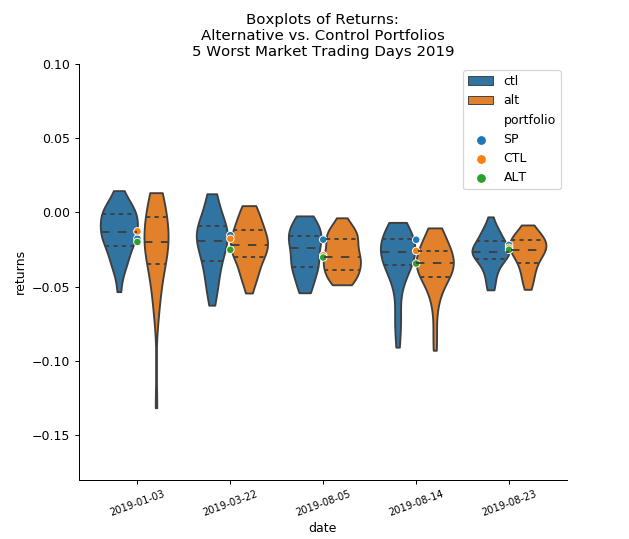

<IPython.core.display.Javascript object>


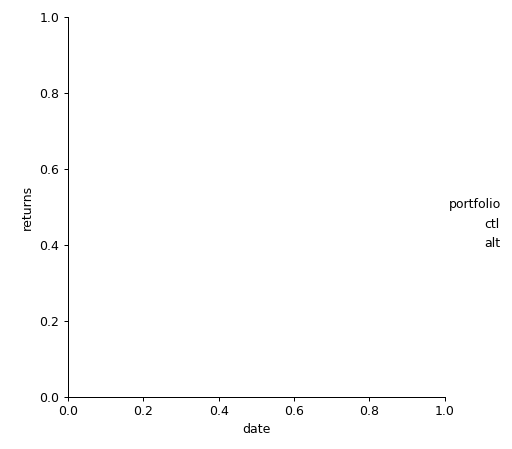

(-0.18, 0.1)

In [314]:
fig, ax = plt.subplots(1,1, figsize=(7,6))
sns.catplot(ax=ax, data=melted_df, kind='violin', x='date', y='returns', hue='portfolio', 
           inner='quartile', #inner='stick', 
            split=False, alpha=0.5, cut=0)
# sns.scatterplot(ax=ax, data=sp_dates_data, x='date', y='returns', color='black')
# sns.scatterplot(ax=ax, data=ctl_dates_data, x='date', y='returns', color='blue')
# sns.scatterplot(ax=ax, data=alt_dates_data, x='date', y='returns', color='red')
sns.scatterplot(ax=ax, data = total_dates_data, x='date', y='returns', hue='portfolio')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Boxplots of Returns:\nAlternative vs. Control Portfolios\n5 Worst Market Trading Days 2019')
ax.tick_params(axis="x", labelsize=8, rotation=20)
ax.set_ylim(-0.18, 0.1)
#plt.savefig("plots\\boxplot_ac1.png")
#ax.savefig('plots\\boxplot_ac1.png')

## Generate the Boxplot of the Returns (5 worst dates of control portfolio)

In [67]:
# ctl_ret19.loc[worst_dates_sp19.index[0], :], 
# alt_ret19.loc[worst_dates_sp19.index[0], :]

In [89]:
data = [
    ctl_ret19.loc[ctl_ret19.index[0], :], alt_ret19.loc[alt_ret19.index[0], :],
    ctl_ret19.loc[ctl_ret19.index[1], :], alt_ret19.loc[alt_ret19.index[1], :],
    ctl_ret19.loc[ctl_ret19.index[2], :], alt_ret19.loc[alt_ret19.index[2], :],   
    ctl_ret19.loc[ctl_ret19.index[3], :], alt_ret19.loc[alt_ret19.index[3], :],    
    ctl_ret19.loc[ctl_ret19.index[4], :], alt_ret19.loc[alt_ret19.index[4], :]    
#     logn, logn[bootstrap_indices],
#     expo, expo[bootstrap_indices],
#     gumb, gumb[bootstrap_indices],
#     tria, tria[bootstrap_indices],
]


In [85]:
# np.median(ctl_ret19.loc[ctl_ret19.index[0], :]), np.median(alt_ret19.loc[alt_ret19.index[0], :])

In [84]:
# worst_dates_sp19.index.sort_values()

In [82]:
worst_dates = worst_dates_sp19.index.sort_values()

In [79]:
for date in worst_dates_sp19.index:
    print(date)

2019-08-23 00:00:00
2019-08-14 00:00:00
2019-08-05 00:00:00
2019-01-03 00:00:00
2019-03-22 00:00:00


In [88]:
import seaborn as sns

In [191]:
# sns.boxplot(
#     data=data,
#     palette=[sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"]],
#     showmeans=True, lab
# )

In [184]:
# sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=total_df);

In [92]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [185]:
# fig, ax = plt.subplots(1,1, figsize=(7,6))
# for date in worst_dates:
#     temp_data = ctl_ret19.loc[date, :], alt_ret19.loc[date, :]
#     ax.boxplot(temp_data)
    
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# plt.show()

In [190]:
# fig, ax = plt.subplots(1,1, figsize=(7,6))
# # ax.boxplot(alt_ret19.loc[worst_dates_sp19.index, :])
# # ax.boxplot(ctl_ret19.loc[worst_dates_sp19.index, :])
# ax.boxplot(data)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)


# tick_marks = []
# # for date in worst_dates_sp19.index:
# #     tick_marks.append(date)
# #     tick_marks.append(date)
# #ax.set_xticklabels(worst_dates_sp19.index)
# #ax.set_xticklabels(tick_marks)
# ax.tick_params(axis="x", labelsize=8, rotation=20)
# ax.set
# plt.show()

### Plot of Sigma ~ Expected Returns of Alternative Portfolio and Control Portfolios